### Hasti Hojabrosadati - 97216040

Last modification: Sunday 

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from IPython.display import display, HTML
warnings.filterwarnings("ignore")

In [122]:
import seaborn as sns
sns.set_style('whitegrid')

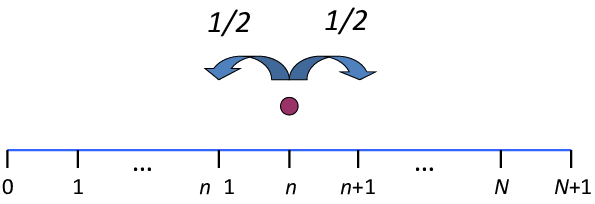

# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

In [110]:
#Using algorithm given at: Giordano N.J, Nakanishi H. (2006). Computational Physics. 
#                          2nd rev. Chap.7,Random systems. USA:Person.

def Random_walk(measurment_step,step,probability):
    xx = 0
    endpoint,xx,xxx,xxxx=[],[],[],[]
    for i in range(measurment_step): #ensemble
        x=0
        for j in range(1,step+1):
            if np.random.random(1)[0]<probability:   x += 1       
            else:                                    x -= 1
        endpoint.append(x)
        xx.append(x**2)
        xxx.append(x**3)
        xxxx.append(x**4)
              
        if i%500==0: print('Still running: {}/{}'.format(i,measurment_step))
        
    x1,x2,x3,x4 = np.mean(endpoint),np.mean(xx),np.mean(xxx),np.mean(xxxx)
    print( x1,x2,x3,x4)
    moment1,moment2= x1, x2-x1**2
    moment3,moment4 = x3 - 3*x2*x1 + (2*x1**3) , x4 - 4*x3*x1 +(12*x2*x1*x1) - 6*x1**4
       
    time_step = np.linspace(0,measurment_step,measurment_step)
    fig=plt.figure(figsize=(15,7))
    plt.scatter(time_step,endpoint,color = 'k',marker = '.')
    plt.title('One Dimentional Random Walk')
    plt.xlabel('time step')
    plt.ylabel('x')
    plt.show()
    df = pd.DataFrame(zip([moment1],[moment2],[moment4],[moment3]),
                  columns= ['Mean','Variance' ,'Skewness' , 'Curtosis'],index=[' '] )
    display(df)
    return endpoint, time_step 

Still running: 0/1000
Still running: 500/1000
-0.982 513.652 -1529.848 803557.456


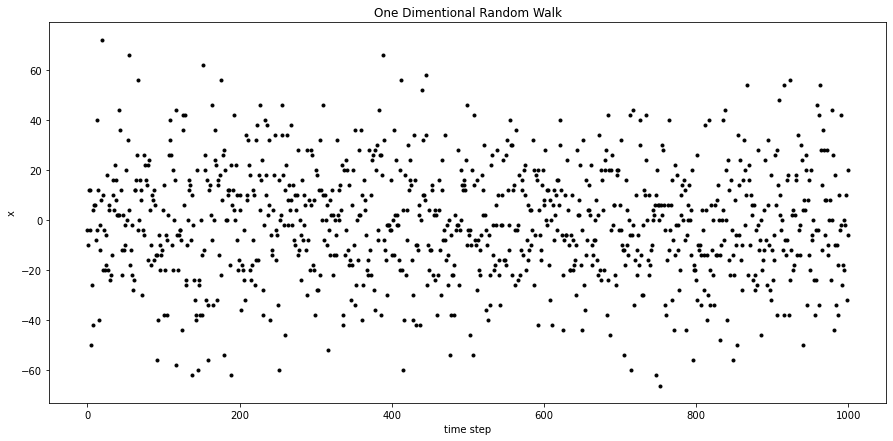

,Mean,Variance,Skewness,Curtosis
,-0.982,512.687676,803486.556946,-18.52314


CPU times: user 1.54 s, sys: 47.2 ms, total: 1.59 s
Wall time: 1.59 s


In [111]:
%%time
endpoint, time_step = Random_walk(1000,500,0.5)

In [217]:
def Random_walk_optim_1(steps,measurment_step):
    end,xx,xxx,xxxx=[],[],[],[]
    for ens in range(measurment_step):
        step=[2*np.random.randint(0,2,size=(steps))-1]
        endpoint=np.sum(step)
        end.append(endpoint)
        xx.append(endpoint**2)
        xxx.append(endpoint**3)
        xxxx.append(endpoint**4)
    x1,x2,x3,x4 = np.mean(end),np.mean(xx),np.mean(xxx),np.mean(xxxx)
    print( x1,x2,x3,x4)
    moment1,moment2= x1, x2-x1**2
    moment3,moment4 = x3 - 3*x2*x1 + (2*x1**3) , x4 - 4*x3*x1 +(12*x2*x1*x1) - 6*x1**4
    
    time_step = np.linspace(0,measurment_step,measurment_step)
    fig=plt.figure(figsize=(15,7))
    plt.scatter(time_step,end,color = 'k',marker = '.')
    plt.title('One Dimentional Random Walk')
    plt.xlabel('time step')
    plt.ylabel('x')
    plt.show()
    df = pd.DataFrame(zip([moment1],[moment2],[moment4],[moment3]),
                  columns= ['Mean','Variance' ,'Skewness' , 'Curtosis'],index=[' '] )
    display(df)
    return end

-0.23262 9954.34252 1630.77864 295273194.39664


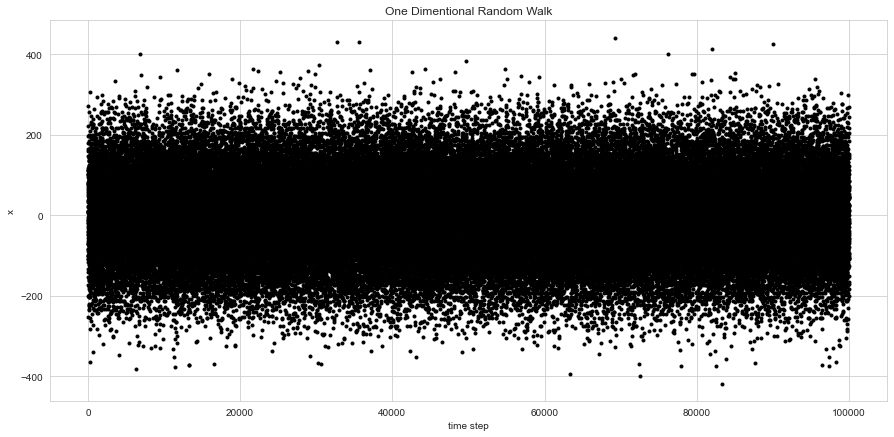

,Mean,Variance,Skewness,Curtosis
,-0.23262,9954.288408,2.952812e+08,8577.490936


CPU times: user 12.9 s, sys: 299 ms, total: 13.2 s
Wall time: 13.2 s


In [218]:
%%time
x1 = Random_walk_optim_1(10000,100000)

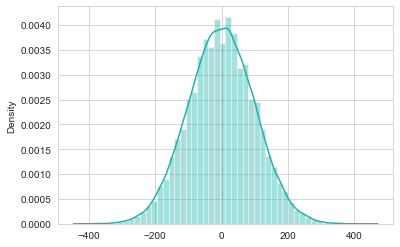

In [219]:
sns.distplot(x1,color='lightseagreen')
plt.show()

now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


In [ ]:
#explain here

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

In [212]:
def Random_walk_optim_2(steps,measurment_step):
    end,xx,xxx,xxxx=[],[],[],[]
    for ens in range(measurment_step):
        step = np.random.choice([1,-1,-1],steps)
        endpoint = np.sum(step)
        end.append(endpoint)
        xx.append(endpoint**2)
        xxx.append(endpoint**3)
        xxxx.append(endpoint**4)
    x1,x2,x3,x4 = np.mean(end),np.mean(xx),np.mean(xxx),np.mean(xxxx)
    print( x1,x2,x3,x4)
    moment1,moment2= x1, x2-x1**2
    moment3,moment4 = x3 - 3*x2*x1 + (2*x1**3) , x4 - 4*x3*x1 +(12*x2*x1*x1) - 6*x1**4
    
    time_step = np.linspace(0,measurment_step,measurment_step)
    fig=plt.figure(figsize=(15,7))
    plt.scatter(time_step,end,color = 'k',marker = '.')
    plt.title('One Dimentional Random Walk')
    plt.xlabel('time step')
    plt.ylabel('x')
    plt.show()
    df = pd.DataFrame(zip([moment1],[moment2],[moment4],[moment3]),
                  columns= ['Mean','Variance' ,'Skewness' , 'Curtosis'],index=[' '] )
    display(df)
    return end

Still running: 0/100
-34.4 1269.28 -49412.48 2013504.64


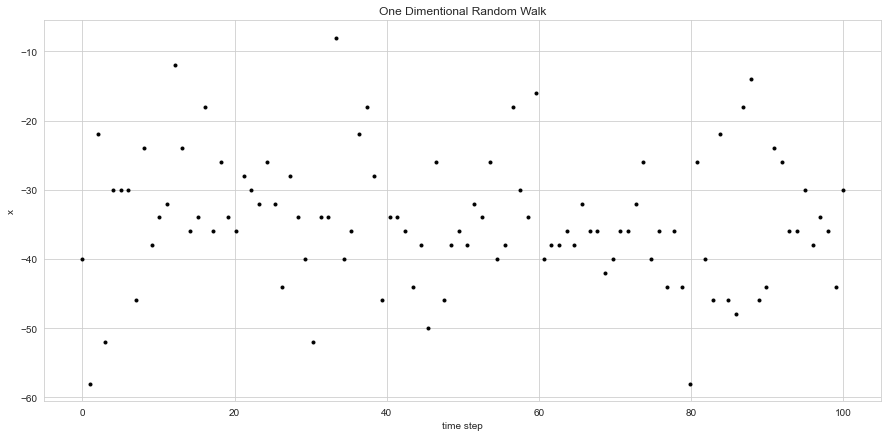

,Mean,Variance,Skewness,Curtosis
,-34.4,85.92,4836484.224,162.048


In [214]:
endpoint , time_step = Random_walk(100,100,1/3)

-3333.32124 11119901.1488 -37125333841.17408 124046526043140.95


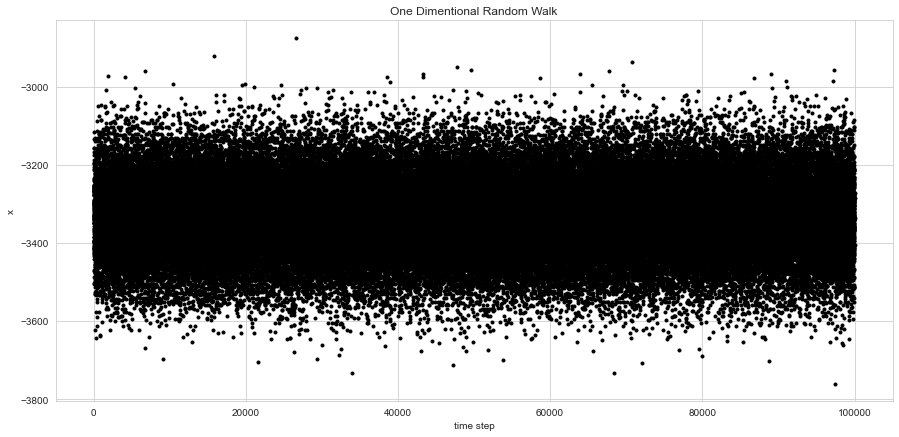

,Mean,Variance,Skewness,Curtosis
,-3333.32124,8870.659765,3.709566e+14,6362.035416


CPU times: user 18.9 s, sys: 279 ms, total: 19.2 s
Wall time: 19.2 s


In [213]:
%%time
x2 = Random_walk_optim_2(10000,100000) #endpoint , time_step = Random_walk(100000,10000,1/3,10000)

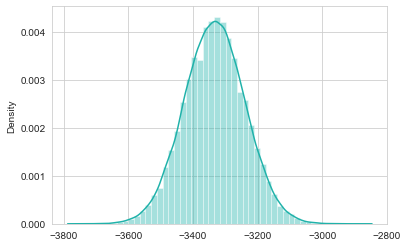

In [216]:
sns.distplot(x,color='lightseagreen')
plt.show()

according to your result, can you tell how the shape of PDF function related to its cumulants?

In [ ]:
#explain here

# Conditional Probability


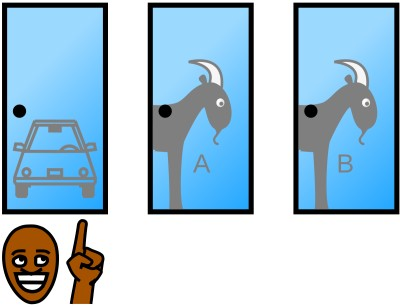

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

In [697]:
def Monty_Hall(doors,size):
    car1,car2=0,0
    Run=0
    
    while Run<size:
        index,second_index = [0,1,2],[0,1,2]
        first_choice = np.random.choice([0,1,2])
        index.remove(first_choice)

        if doors[index[0]]==0 and doors[index[1]]==0:    host_index = index[np.random.choice([0,1])]
        elif doors[index[0]]==0 and doors[index[1]]!=0:  host_index = index[0]
        else:                                            host_index = index[1] 

        second_index.remove(host_index) 
        second_choice = np.random.choice(second_index)

        if first_choice==second_choice: 
            if doors[second_choice]==1: car1+=1
            else: car2+=1
        if first_choice!=second_choice: 
            if doors[second_choice]==1: car2+=1
            else: car1+=1
        Run+=1
        
    door_state=[] 
    for i in range(3):
        if doors[i]==0: door_state.append('Goat')
        else: door_state.append('Car')
        
    print('Initial doors states: {}'.format(door_state))
    print('Stay and win Probability: {}. Choose and win Probability: {}'.format(round(car1/Run*100,2), round(car2/Run*100,2)))
    print()
     
Monty_Hall([0,0,1],100000)
Monty_Hall([0,1,0],100000)
Monty_Hall([1,0,0],100000)

Initial doors states: ['Goat', 'Goat', 'Car']
Stay and win Probability: 33.44. Choose and win Probability: 66.56

Initial doors states: ['Goat', 'Car', 'Goat']
Stay and win Probability: 33.49. Choose and win Probability: 66.51

Initial doors states: ['Car', 'Goat', 'Goat']
Stay and win Probability: 33.31. Choose and win Probability: 66.69



# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


a)

In [125]:
#Using Algorithm provided at: Newman, Mark E. J., Barkema, Gerard T. (1999).
#                             Monte Carlo methods in statistical physics. 
#                             Chap 16, Random numbers.   

def Linear_congruential_generators(i, a, c, m):
    return (a*i+c)%m

def Random_Sequence(a,c,m,seed,n):
    sequence=[]
    for j in range(n):
        i = Linear_congruential_generators(seed,a,c,m)
        seed = i
        sequence.append(i)
    s = np.array(sequence)
    maxx,minn = np.max(s),np.min(s)
    return s/(abs(maxx-minn))

def Uniform(low, high, size, a, c, m, seed):
    uniform=[]
    sequence = Random_Sequence(a,c,m,seed,size)
    for r in sequence:
        i = low + (high-low)*r
        uniform.append(i)
    return np.array(uniform)

Unifrom Random Numbers: [2.24505638e-13 1.68749238e-11 1.26565629e-09 ... 2.35192512e+00
 6.39011443e+00 9.24677834e+00]
Mean: 5.0130763741617645        Variance: 8.181692790560271


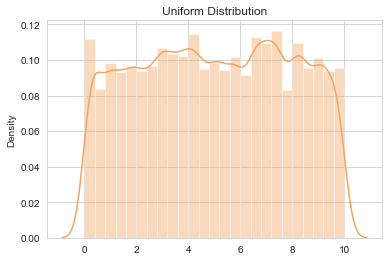

In [126]:
uniform = Uniform(0, 10, 100000, 75, 74 ,2e16, 5)  #Putting m, a and c same as ZX81.
print('Unifrom Random Numbers:',uniform)
print('Mean:',np.mean(uniform),'       Variance:',np.var(uniform))
ax = sns.distplot(uniform, bins=25, color='sandybrown')
plt.title('Uniform Distribution')
plt.show()

In [127]:
#Using Algorithm given at : Knuth, Donald Ervin (1997), Seminumerical Algorithms, The Art of Computer Programming, 
#                           vol. 2 (3rd ed.), Chap10, Discrete Univariate Distributions.
#                           Addison Wesley, ISBN 978-0-201-89684-8


def KnuthـBinomial(n,p,index,uniform_list):
    x,i=0,0
    while i<n:
        i+=1
        if uniform_list[index]<p:
            x+=1
        index+=1
    return x,index

def Bionomial(n,p,size,seed):
    sequence=[]
    index=0
    uniform_list = Uniform(0, 1, size*10, 75, 74 ,2e16, seed) 
    for i in range(size):
        rnd,index = KnuthـBinomial(n,p,index,uniform_list)
        sequence.append(rnd)
    return np.array(sequence)

Bionomial Random Numbers: [9 5 4 ... 6 5 3]
Mean: 4.97486        Variance: 2.6412679803999994


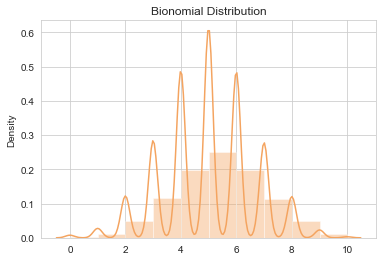

In [129]:
bionomial=Bionomial(10,0.5,100000,10)
print('Bionomial Random Numbers:', bionomial)
print('Mean:',np.mean(bionomial),'       Variance:',np.var(bionomial))
ax = sns.distplot(bionomial, bins=10, color='sandybrown')
plt.title('Bionomial Distribution')
plt.show()

In [130]:
#Using Algorithm given at : Knuth, Donald Ervin (1997), Seminumerical Algorithms, The Art of Computer Programming, 
#                           vol. 2 (3rd ed.), Chap10, Discrete Univariate Distributions.
#                           Addison Wesley, ISBN 978-0-201-89684-8


def KnuthـPoission(lam,index,uniform_list):
    p,k=1,0
    
    elam = np.exp(-lam)
    while True:
        k += 1
        u = uniform_list[index]
        index+=1
        p *= u
        if p <= elam:
            return k-1,index
        
def Poission(lam,size,seed):
    sequence=[]
    index=0
    uniform_list = Uniform(0, 1, size*10, 75, 74 ,2e16, seed) 
    for i in range(size):
        rnd,index = KnuthـPoission(lam,index,uniform_list)
        sequence.append(rnd)
    return np.array(sequence)

Poission Random Numbers: [0 0 0 ... 1 3 3]
Mean: 2.02396        Variance: 2.0816659183999997


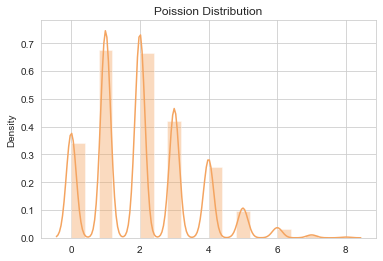

In [131]:
poission = Poission(2,100000,3)  
print('Poission Random Numbers:',poission)
print('Mean:',np.mean(poission),'       Variance:',np.var(poission))
ax = sns.distplot(poission, bins=20, color='sandybrown')
plt.title('Poission Distribution')
plt.show()

b) 

In [132]:
import random
def Subsets(data,lenght,number):
    S=[]
    for i in range(number):
        sub=np.ndarray.tolist(np.random.choice(data, lenght))
        S.append(np.mean(sub))
    return S

In [133]:
s2   = Subsets(uniform,2,10000)
s5   = Subsets(uniform,5,10000)
s10  = Subsets(uniform,10,10000)
s20  = Subsets(uniform,20,10000)
s100 = Subsets(uniform,100,10000)

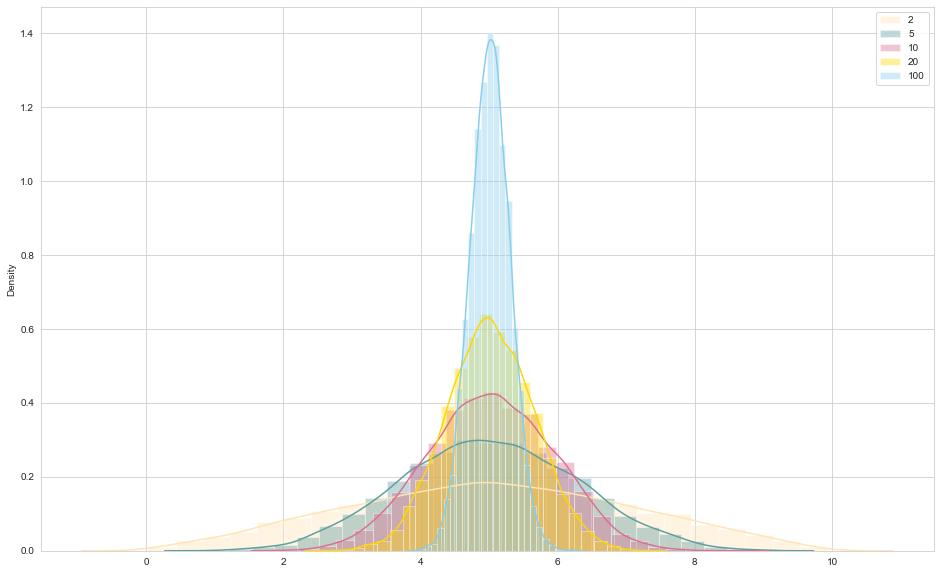

In [134]:
fig = plt.figure(figsize=(16, 10))
color=['moccasin', 'cadetblue',  'palevioletred', 'gold', 'skyblue', 'dodgreblue']
for i,ax,name,c in zip([s2, s5,s10, s20,s100],range(1,6),['2','5','10','20','100'],color):
    sns.distplot(i,color=c,bins=25,label=name)
    plt.legend()
plt.show()

c) They dont follow the same disturbution as the original data set.They follow poission disturbution. The mean is the same as before. As the subset lenght increases, variance gets lower so the bell gets narrower. 

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



In [136]:
p=0.5 
N = [5, 10, 20, 50, 100, 200, 1000]
binomial_list, poission_list = [], []
for n in N:
    binomial_list.append(np.random.binomial(n,p,1000))
    lam=n*p
    poission_list.append(np.random.poisson(lam,1000))

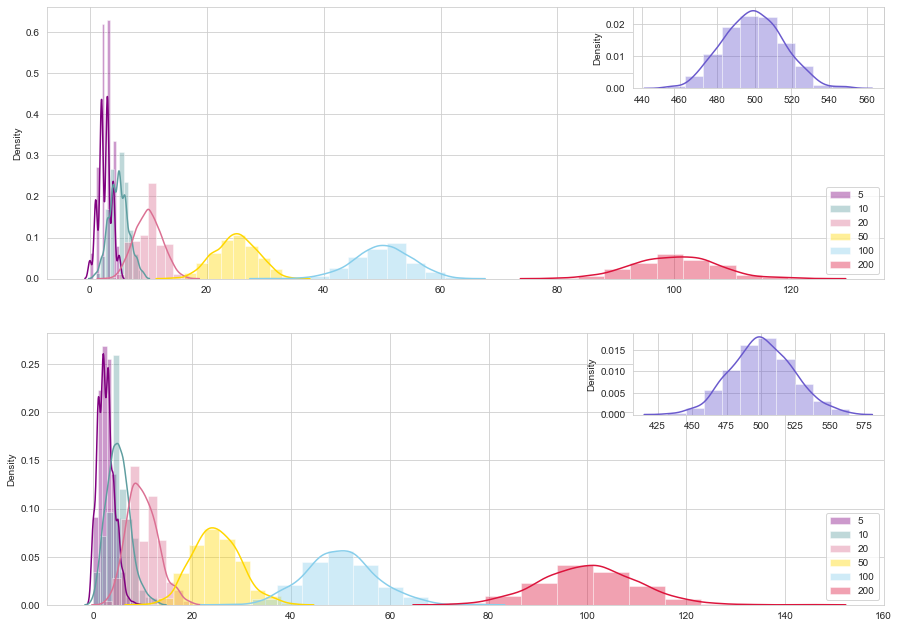

In [180]:
fig = plt.figure(figsize=(15, 11))
color=['purple', 'cadetblue',  'palevioletred', 'gold', 'skyblue', 'crimson','k']
a=plt.subplot(2,1,1)
for i,ax,name,c in zip(binomial_list,range(1,7),['5','10','20','50','100','200','1000'],color):
    sns.distplot(i,color=c,bins=10,label=name)
    
ins1 = a.inset_axes([0.7,0.7,.3,.3])
sns.distplot(binomial_list[6],color='slateblue',bins=10,ax=ins1,label='1000')

plt.legend(loc='lower right')
b = plt.subplot(2,1,2)
for i,ax,name,c in zip(poission_list,range(1,7),['5','10','20','50','100','200','1000'],color):
    sns.distplot(i,color=c,bins=10,label=name)
ins2 = b.inset_axes([0.7,0.7,.3,.3])
sns.distplot(poission_list[6],color='slateblue',bins=10,ax=ins2,label='1000')
plt.legend(loc='lower right')
plt.show()

As N increases mean and variance of the data increases. Skeweeness reduces. 

# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform )- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


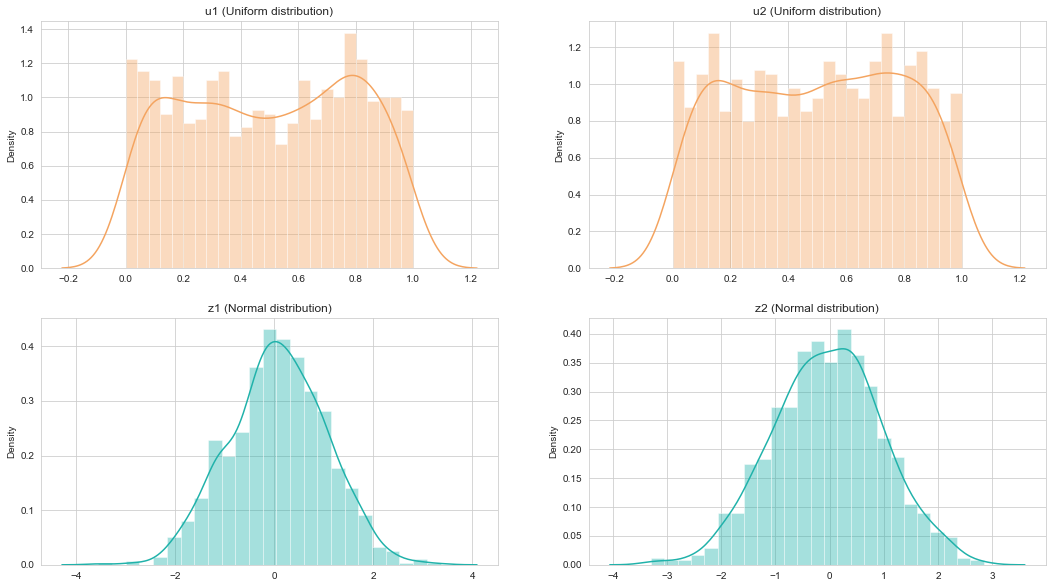

In [197]:
#Using formula given at: Scott, D. W. (2011). Box-Muller transformation. 
#                        Wiley Interdisciplinary Reviews: Computational Statistics, 3(2), 
#                        177–179. doi:10.1002/wics.148  

s,binn = 1000,25 #Number of samples, Number of bins
u1, u2 = np.random.uniform(1e-10, 1-1e-10,size=s),np.random.uniform(1e-10, 1-1e-10,size=s)
z1, z2 = (-2*np.log(1-u2))**(0.5)*np.cos(2*np.pi*u1) , (-2*np.log(1-u2))**(0.5)*np.sin(2*np.pi*u1)
fig = plt.figure(figsize=(18, 10))
name = ['u1 (Uniform distribution)','u2 (Uniform distribution)','z1 (Normal distribution)','z2 (Normal distribution)']
for i,ax,name,c in zip([u1, u2,z1, z2],range(1,5),name,['sandybrown','sandybrown','lightseagreen','lightseagreen']):
    ax =  fig.add_subplot(2, 2, ax )
    sns.distplot(i,color=c,bins=binn)
    plt.title(name)

b)Calculate mean of the sample. Its variance.

In [607]:
df = pd.DataFrame([[np.mean(u1),np.var(u1)],[np.mean(u2),np.var(u2)],[np.mean(z1),np.var(z1)],[np.mean(z1),np.var(z1)]]
                 ,columns=['Mean','Variance'],index=['u1','u2','z1','z2'])
df

,Mean,Variance
u1,0.502686,0.078822
u2,0.505938,0.082214
z1,-0.075044,1.016422
z2,-0.075044,1.016422


c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?

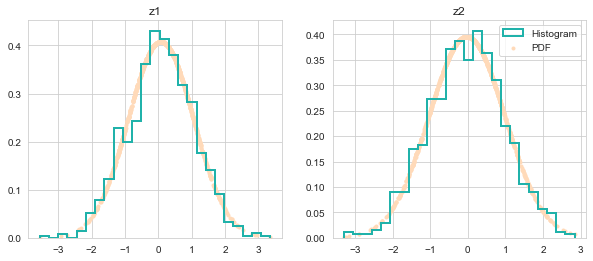

In [198]:
def Gaussian_distribution(x):
    return np.exp(-(x-np.mean(x))**2/2/np.var(x))/np.sqrt(2*np.pi*np.var(x))

p_z1,p_z2 = Gaussian_distribution(z1),Gaussian_distribution(z2)
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.scatter(z1,p_z1,marker = '.',color='peachpuff',label='PDF')
plt.hist(z1,bins=binn,density=True,color='lightseagreen',histtype='step', stacked=True, fill=False,lw=2,label='Histogram')
plt.title('z1')
plt.subplot(1,2,2)
plt.scatter(z2,p_z2,marker = '.',color='peachpuff',label='PDF')
plt.hist(z2,bins=binn,density=True,color='lightseagreen',histtype='step', stacked=True, fill=False,lw=2,label='Histogram')
plt.title('z2')
plt.legend()
plt.show()

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

,Mean,Standard deviation
Previous data,-0.075044,1.008177
New data,2.000000,4.036731


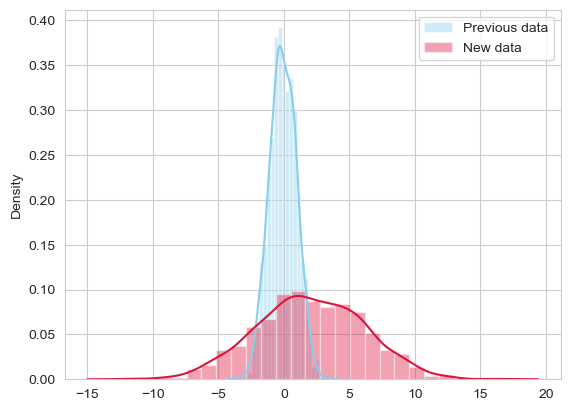

In [709]:
#Using 𝑦𝑖=𝑚2+(𝑥𝑖−𝑚1)×𝑠2/𝑠1: x_i has mean m_1 and standard deviation s_1.
#We want y_i with the new mean m_2 and the new standard deviation s_2.

m1,s1 = np.mean(z1),np.std(z2)
m2,s2 = 2,4
y=[]
for i in range(len(z1)):
    y.append(m2+(z1[i]-m1)*s2/s1)
sns.distplot(z1,color='skyblue',label='Previous data') 
sns.distplot(y,color='crimson',label='New data')
plt.legend()
df = pd.DataFrame([[np.mean(z1),np.std(z1)],[np.mean(y),np.std(y)]]
                 ,columns=['Mean','Standard deviation'],index=['Previous data','New data'])
display(df)
plt.show()

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [45]:
def Nice_Matrix(n,size):
    M = np.random.randint(0,n**2,size=(n,n)) 
    M_nice=[]
    def rows_columns(M): 
        sum_c,sum_r=[],[]
        for k in range(n):
            sum_c.append(np.sum(M[:,k])) 
            sum_r.append(np.sum(M[k,:]))
        return sum_c,sum_r
    run=1
    sum_c,sum_r = rows_columns(M)
    while len(M_nice)<size:
        if len(set(sum_c)) == 1 and  len(set(sum_r)) == 1 and set(sum_c) == set(sum_r) and len(sum_c) == len(sum_r):
            M_nice.append(np.ndarray.tolist(M))
            run=1

        if run==1:
            M=np.random.randint(0,n**2,size=(n,n))
            sum_c,sum_r=rows_columns(M)
    return M_nice

M_nice2=Nice_Matrix(2,3)
print('n=2:')
print(np.array(M_nice2))

n=2:
[[[1 1]
  [1 1]]

 [[2 2]
  [2 2]]

 [[0 0]
  [0 0]]]


In [51]:
np.full((3, 5), 8)

array([[8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8],
       [8, 8, 8, 8, 8]])

In [189]:
[i for i in range(1,(n)**2+1)]

[1, 2, 3, 4, 5, 6, 7, 8]

In [190]:
n=2
np.random.choice([i for i in range(1,(n)**2+1)], size=(n,n))

array([[1, 2],
       [4, 3]])

In [193]:
def Nice_Matrix(n,size):
    M = np.random.choice([i for i in range(1,(n)**2+1)], size=(n,n))
    M_nice=[]
    def rows_columns(M): 
        sum_c,sum_r=[],[]
        for k in range(n):
            sum_c.append(np.sum(M[:,k])) 
            sum_r.append(np.sum(M[k,:]))
        return sum_c,sum_r
    run=1
    sum_c,sum_r = rows_columns(M)
    while len(M_nice)<size:
        if len(set(sum_c)) == 1 and  len(set(sum_r)) == 1 and set(sum_c) == set(sum_r) and len(sum_c) == len(sum_r):
            M_nice.append(np.ndarray.tolist(M))
            print(M)
            run=1

        if run==1:
            M = np.random.choice([i for i in range(1,(n)**2+1)], size=(n,n))
            sum_c,sum_r=rows_columns(M)
    return M_nice

M_nice2=Nice_Matrix(2,3)
print('n=2:')
print(np.array(M_nice2))

[[3 1]
 [1 3]]
[[3 3]
 [3 3]]
[[3 4]
 [4 3]]
n=2:
[[[3 1]
  [1 3]]

 [[3 3]
  [3 3]]

 [[3 4]
  [4 3]]]


Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

In [225]:
np.random.choice([1,-1], size=(1,17))

array([[ 1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        -1]])